# Intro2AI 1. K-means 

> 参考：
> - Youtube 上的 斯坦福 cs221 [K-means](https://www.youtube.com/watch?v=O9vCb30sHBA&list=PLoROMvodv4rO1NB9TD4iUZ3qghGEGtqNX&index=4&ab_channel=stanfordonline)
> - Youtube 视频 [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer)
> - 布里斯托的教学视频与课件（非公共连接）
> - Meduim 文章：[Understanding K-means Clustering in Machine Learning](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)
> - Meduim 文章：[K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)
> - Muthukrishnan 大佬的个人站文章：[Mathematics behind K-Mean Clustering algorithm](https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/)



## 1. K-Means 原理

### 1.1 简介

 K - 聚类算法(K-means) 是一个经典的无监督学习算法(Unsupervised learning)。即对没有标签的数据进行分类。被分类的数据可以是 图像，自然语言，和多维点集。但是 K-means 的准确率并没有其他监督学习算法高。下图是利用两个数据进行 K-means 分类后的结果。可以看出分类中有一些错误存在。

![K-means 的应用](./pics/kmeans_application.png)

在 K-means 中，算法会自动的找到数据之间的相似点，并将相似的数据归为一类。这里的一个类也被称作一个群(cluster)。比如下面例子中的两个群：

![K-means 的例子](./pics/kmeans-example.png)

### 1.2 过程

K-means 的具体过程如下：
1. 指定群的数量 K。
2. 首先对数据集进行洗牌，然后随机选择K个数据点作为质心而不进行替换，从而初始化中心。
3. 进行迭代直到中心没有变化。即数据点到集群的分配没有改变。
   1. 计算数据点和所有质心之间的平方距离之和。
   2. 将每个数据点分配给最近的集群（中心）。
   3. 通过取属于每个集群的所有数据点的平均值来计算集群的中心。

![k-means 过程演示](./pics/kmeans.gif)

再用数学语言表达一遍：

K-means 算法最关心的是所有点到其中心距离的总和:

$$
Loss_{kmeans}(z,\mu) = \sum_{i=1}^n ||{\phi(x_i)-\mu_{z_i}}||^2
$$

其中：
- $\mu$ 是中心点的位置
- $z_i$ 是数据样本 i 所属的群



我们想要找到使得 $Loss_{kmeans}$ 最小的 $z$ 和 $\mu$：

$$
min_z\, min_\mu\, Loss_{kmeans}(z,\mu)
$$


比较麻烦的是 $z$ 和 $\mu$ 是共生关系。因此才有了我们上面的先随机初始化 K 个中心位置，然后迭代优化。

有了初始的中心点位置后，就可以找到每一个点所属的群：

$$
z_i \leftarrow arg\, \min_{k=1,...,K} ||{\phi(x_i)-\mu_{z_i}}||^2
$$

之后再通过 $z_i$ 找到 $\mu_k$:

$$
\mu_k = mean(\sum_{i:z_i=k}\phi(x_i))
$$

### 1.3 K 值的选择

在 K-menas 中 K 值 ，即集群数量，被称作超参数 (hyper-parameter)。有些情况下，我们是不知道数据到底有几类，因此需要通过测试，来找到最适合 K 值。有一个叫做 Elbow_Method 的方法可以帮助我们找到合适的 K 值，如下图所示：

![Elbow_Method](./pics/elbow_k.png)

在此图中，我们可以明显的找到一个斜率拐点，即超过 2 之后，数据的距离变化就不明显了，因此我们认为，这个数据集总共有 2 个群。

## 2. 代码示例

### 2.1 用 numpy 实现 K-means



导入库：

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

创建一个 K_Means 的类，实现算法：

In [10]:
class K_Means:
    
    def __init__(self, k=3, max_iterations = 500):
        self.k = k
        self.max_iterations = max_iterations
    
    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)
        
    def fit(self, data):
        
        #let the first K points from the dataset be the initial centroids
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        #start K-Mean clustering
        for i in range(self.max_iterations):
            #create classifications the size of K
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []#empty them
                
            #find the distance between the points and the centroids
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                
                #find which cluster the datapoint belongs to by finding the minimum
                #ex: if distances are 2.03,1.04,5.6,1.05 then point belongs to cluster 1 (zero index)
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
                
            #now that we have classified the datapoints into clusters, we need to again 
            #find new centroid by taking the centroid of the points in the cluster class
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
                


写一个主函数，做测试：

{0: array([ 9.2825366 , -3.00889319]), 1: array([ 2.91353216, -2.45992985]), 2: array([ 3.15235452, -6.78700212])}


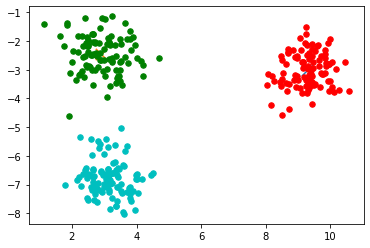

In [14]:
def main():
    
    #generate dummy cluster datasets
    K = 3
    X, y_true = make_blobs(n_samples=300, centers=K,
                           cluster_std=0.60, random_state=30)
    
    k_means = K_Means(K)
    k_means.fit(X)
    
    
    print(k_means.centroids)
    
    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    
if __name__ == "__main__":
    main()

### 2.2 sk-learn 库

下面我们使用 sklearn 库中的函数来做上面的列子：

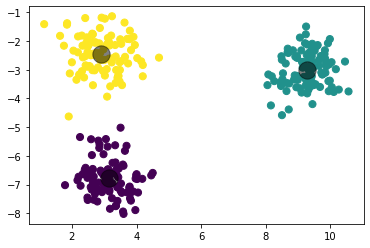

In [16]:
from sklearn.cluster import KMeans

#generate dummy cluster datasets
K = 3
X, y_true = make_blobs(n_samples=300, centers=K,
                           cluster_std=0.60, random_state=30)

k_means = KMeans(K)
k_means.fit(X)

cluster_centres = k_means.cluster_centers_

y_kmeans = k_means.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

for centroid in cluster_centres:
    plt.scatter(centroid[0],  centroid[1], s=300,  c='black', alpha=0.5)

## 3. 缺点

Kmeans 对于球型群可以很好的分类，线型或者其他复杂的形状，分类效果就没那么好了。

比如下面的例子：

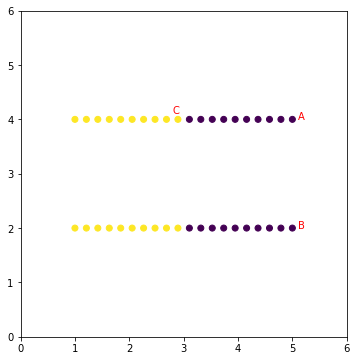

In [17]:
# Create horizantal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c=labels)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.text(5.1, 4, 'A', color='red')
plt.text(5.1, 2, 'B', color='red')
plt.text(2.8, 4.1, 'C', color='red')
ax.set_aspect('equal')

另外在类别距离不是很远时，K-means 会倾向于将数据类别均分，因此当每一类数据的数量不一致时，K-means 的效果不佳。具体情况如下：

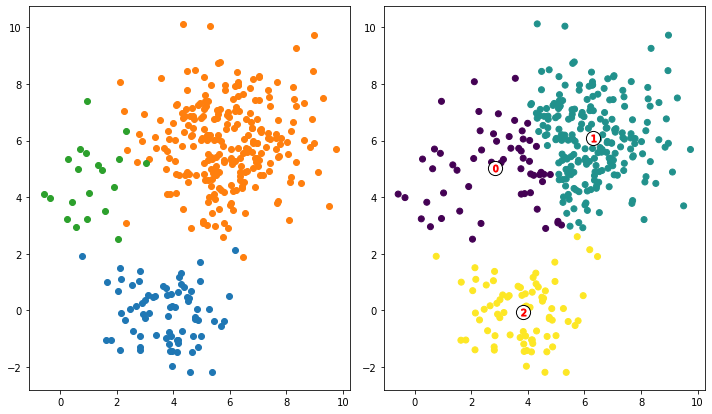

In [18]:
# Create data from three different multivariate distributions
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=250)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
df = np.concatenate([X_1, X_2, X_3])

# Run kmeans
km = KMeans(n_clusters=3)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()